# Base de datos Formula 1

## Cargar archivos

In [32]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib as mpl
import numpy as np
import pandas as pd
import os

In [33]:
# Descarga y cachea datos si es la primera vez
ff1.Cache.enable_cache('cache_folder')
# Carga la sesión de clasificación del GP de Mónaco 2023
session = ff1.get_session(2023, 'Monaco', 'Q')
session.load()  # carga laps, telemetry, weather, etc.
print(session.results.columns)

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '16', '31', '55', '44', '10', '63', '22', '4', '81', '21', '23', '18', '77', '2', '20', '27', '24', '11']


Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')


c:\Users\guill\Escritorio\INFORMATICA\f1\env\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\guill\Escritorio\INFORMATICA\f1\env\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached dat

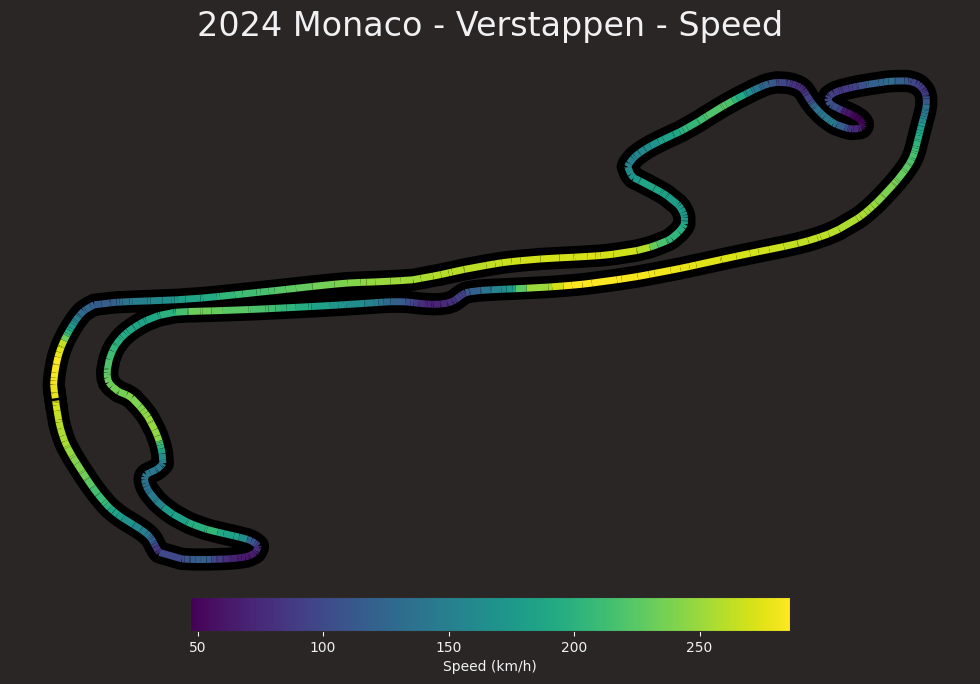

In [39]:
# 1. Cache
os.makedirs('Cache', exist_ok=True)
ff1.Cache.enable_cache('Cache')
plotting.setup_mpl()

# 2. Parámetros
year     = 2024
gp       = 'Monaco'
event    = 'Qualifying'
driver   = 'VER'       

# 3. Carga sesión y vuelta rápida
session = ff1.get_session(year, gp, event)
session.load()
lap     = session.laps.pick_driver(driver).pick_fastest()

# 4. Telemetría con distancia
tel     = lap.get_telemetry().add_distance()
x, y    = tel['X'].to_numpy(), tel['Y'].to_numpy()
color   = tel['Speed'].to_numpy()               # <- velocidad para colorear
points  = np.vstack([x, y]).T.reshape(-1, 1, 2)
segments= np.concatenate([points[:-1], points[1:]], axis=1)

# 5. Colormap y normalización
colormap = plt.get_cmap('viridis') 
norm     = plt.Normalize(color.min(), color.max())

# 6. Dibujo
fig, ax = plt.subplots(figsize=(12,6.75))
fig.suptitle(f'{year} Monaco - Verstappen - Speed', size=24, y=0.97)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# Background track  
ax.plot(x, y, color='black', linewidth=16, zorder=0)

# LineCollection coloreado
lc = LineCollection(segments, cmap=colormap, norm=norm, linewidth=5)
lc.set_array(color)
ax.add_collection(lc)

# Barra de color
cbaxes    = fig.add_axes([0.25, 0.05, 0.5, 0.05])
cbar_norm = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
mpl.colorbar.ColorbarBase(cbaxes, norm=cbar_norm, cmap=colormap,
                          orientation="horizontal", label='Speed (km/h)')

plt.show()

